In [1]:
from qiskit import IBMQ
import networkx as nx
from qiskit.providers.ibmq import least_busy
import matplotlib.pyplot as plt

In [2]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [3]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [4]:
backends = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
                                    and not x.configuration().simulator
                                    and x.status().operational==True)

print(f" Backend with only {least_busy(backends).status().pending_jobs} pending jobs is {least_busy(backends).name()}")

 Backend with only 42 pending jobs is ibmq_belem


In [5]:
backend = provider.get_backend('ibmq_16_melbourne')

# list all jobs which have been executed from our provider
for job in backend.jobs():
    print(job.job_id())
    
print(f" {backend.name()} currently has {backend.status().pending_jobs} pending jobs")

5ec99ce097dd450014f7459e
5e9aa85c39011700187a55da
 ibmq_16_melbourne currently has 14755 pending jobs


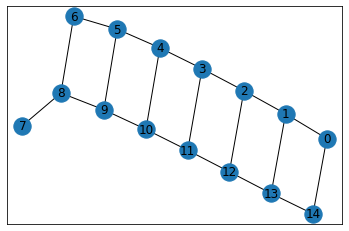

In [6]:
melbourne_conf = backend.configuration()
G = nx.Graph()
G.add_nodes_from(range(0,melbourne_conf.n_qubits))
G.add_edges_from(melbourne_conf.coupling_map)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels = True)

In [7]:
melbourne_props = backend.properties()
melbourne_props.qubits[1]

[Nduv(datetime.datetime(2021, 4, 8, 9, 14, 42, tzinfo=tzlocal()), T1, us, 48.57040506577225),
 Nduv(datetime.datetime(2021, 4, 8, 9, 30, 12, tzinfo=tzlocal()), T2, us, 48.11874386807706),
 Nduv(datetime.datetime(2021, 4, 8, 16, 31, 16, tzinfo=tzlocal()), frequency, GHz, 5.235058514865316),
 Nduv(datetime.datetime(2021, 4, 8, 16, 31, 16, tzinfo=tzlocal()), anharmonicity, GHz, 0),
 Nduv(datetime.datetime(2021, 4, 8, 9, 3, tzinfo=tzlocal()), readout_error, , 0.03590000000000004),
 Nduv(datetime.datetime(2021, 4, 8, 9, 3, tzinfo=tzlocal()), prob_meas0_prep1, , 0.0564),
 Nduv(datetime.datetime(2021, 4, 8, 9, 3, tzinfo=tzlocal()), prob_meas1_prep0, , 0.01539999999999997),
 Nduv(datetime.datetime(2021, 4, 8, 9, 3, tzinfo=tzlocal()), readout_length, ns, 3555.555555555555)]

In [8]:
melbourne_conf.basis_gates

['id', 'rz', 'sx', 'x', 'cx']

In [9]:
gates_on_qubit_1 = [gate.to_dict() for gate in melbourne_props.gates if 1 in gate.qubits]
len(gates_on_qubit_1)

10

In [10]:
for gate in gates_on_qubit_1 : 
    if gate['qubits'][0] == 1:
        print("{} involves qubits:{} and has an error rate of {}".format(gate['gate'],gate['qubits'],melbourne_props.gate_error(gate['gate'], gate['qubits'])))

id involves qubits:[1] and has an error rate of 0.0008840690366020388
rz involves qubits:[1] and has an error rate of 0
sx involves qubits:[1] and has an error rate of 0.0008840690366020388
x involves qubits:[1] and has an error rate of 0.0008840690366020388
cx involves qubits:[1, 13] and has an error rate of 0.05500223937612761
cx involves qubits:[1, 2] and has an error rate of 0.010889085467851195
cx involves qubits:[1, 0] and has an error rate of 0.022233585627947666
